### Fashion Class Classification

#### MNIST Fashion Data Classification

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

MNIST Fashion data consists of 70000 images of 10 different clothing items. The train set consists of 60000 images and the test set has 10000 images. The classes of the images are as follow:

- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot


In [2]:
# train data
train_df = pd.read_csv('fashion-mnist_train.csv')

# test data
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# shape of the data
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [4]:
# view of train data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Visualizing 

In [5]:
# convert to array
training = np.array(train_df, dtype = 'float')
testing = np.array(test_df, dtype = 'float')

In [6]:
# Actual labels corresponding to the integers assigned 
labels = ['0-T-shirt/top', '1-Trouser','2-Pullover','3-Dress','4-Coat','5-Sandal', '6-Shirt','7-Sneaker','8-Bag','9-Ankle boot']

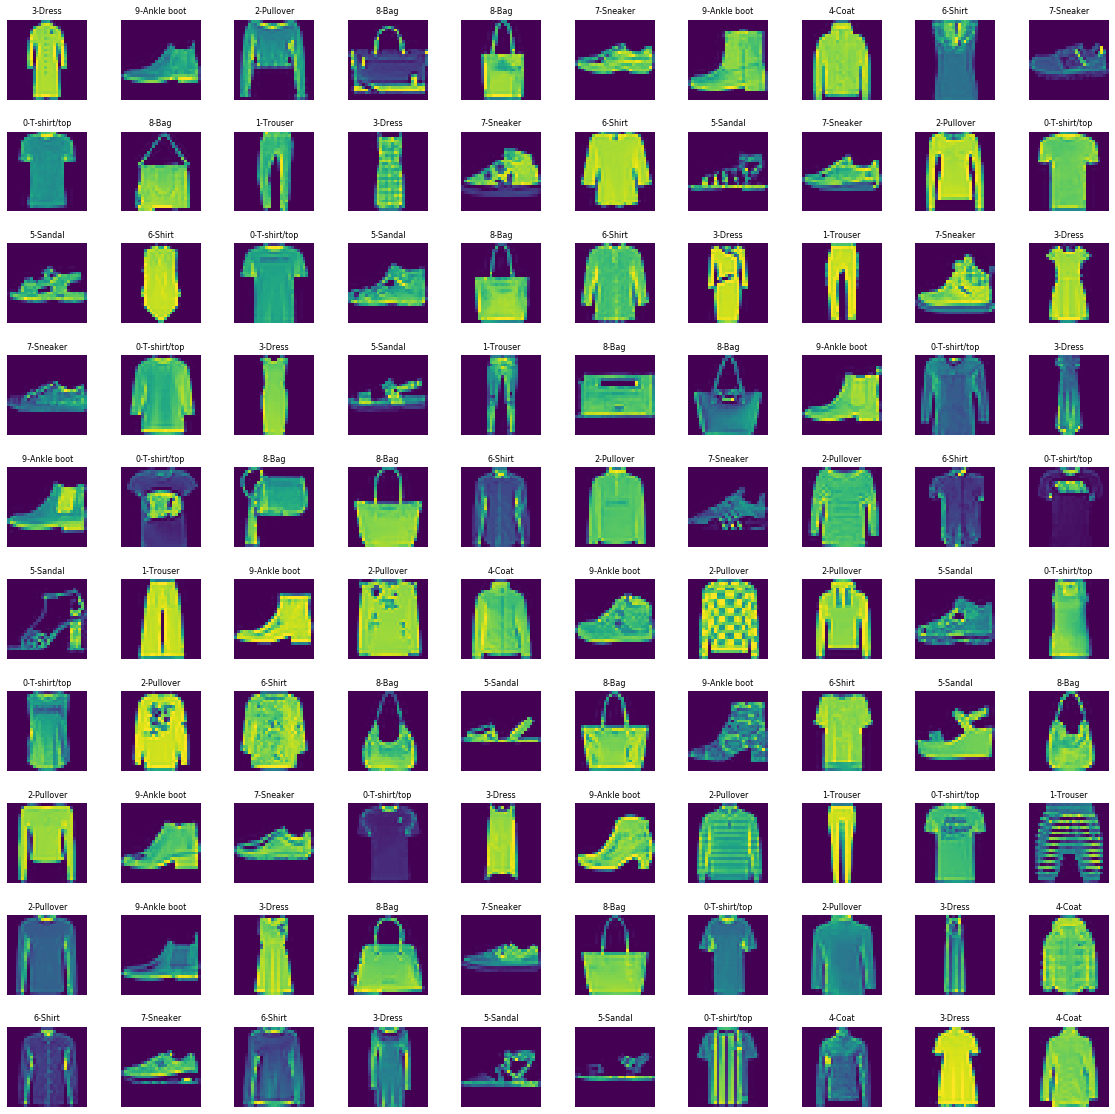

In [7]:
import random

# visualize random 100 images

# Define the dimension of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flatten the 10 x 10 matrix into array of length 100

# get the length of training data
n_training = len(training)

# plot a random image from the training data
for i in np.arange(0, W_grid*L_grid):
    
    # select a random number
    index = random.randint(0, n_training)
    # display the image of the selected index
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(labels[int(training[index, 0])],fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4,)
  

### Modelling - Convolutional Neural Network(CNN)

In [8]:
# separate the input features and target labels and normalize
X_train = training[:,1:]/255
y_train = training[:,0]

In [9]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [10]:
# creating a validation set
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [11]:
print(X_train.shape)
print()
X_train

(48000, 784)



array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.08235294, 0.03921569,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# reshaping the data for CNN
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_validate = X_validate.reshape(X_validate.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [13]:
X_train.shape, X_validate.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [16]:
# Libraries for CNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


In [17]:
# initialize the CNN
model = Sequential()

# 1st CNN layer
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape =(28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# connecting layer
model.add(Dense(units = 32, activation = 'relu'))

# output layer
model.add(Dense(units = 10, activation = 'softmax'))

# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting the model
model.fit(X_train, y_train, epochs = 50, batch_size = 512, validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 26s 546us/sample - loss: 0.7897 - accuracy: 0.7329 - val_loss: 0.4965 - val_accuracy: 0.8184
Epoch 2/50
48000/48000 [==============================] - 26s 539us/sample - loss: 0.4425 - accuracy: 0.8452 - val_loss: 0.4080 - val_accuracy: 0.8599
Epoch 3/50
48000/48000 [==============================] - 25s 517us/sample - loss: 0.3880 - accuracy: 0.8625 - val_loss: 0.3827 - val_accuracy: 0.8661
Epoch 4/50
48000/48000 [==============================] - 22s 466us/sample - loss: 0.3569 - accuracy: 0.8750 - val_loss: 0.3421 - val_accuracy: 0.8785
Epoch 5/50
48000/48000 [==============================] - 24s 491us/sample - loss: 0.3351 - accuracy: 0.8824 - val_loss: 0.3298 - val_accuracy: 0.8848
Epoch 6/50
48000/48000 [==============================] - 24s 508us/sample - loss: 0.3171 - accuracy: 0.8879 - val_loss: 0.3247 - val_accuracy: 0.8867
Epoch 7/50
48000/48000 [====================

48000/48000 [==============================] - 25s 526us/sample - loss: 0.1090 - accuracy: 0.9631 - val_loss: 0.2721 - val_accuracy: 0.9147
Epoch 50/50
48000/48000 [==============================] - 26s 531us/sample - loss: 0.1079 - accuracy: 0.9630 - val_loss: 0.2785 - val_accuracy: 0.9118


### Evaluating the model

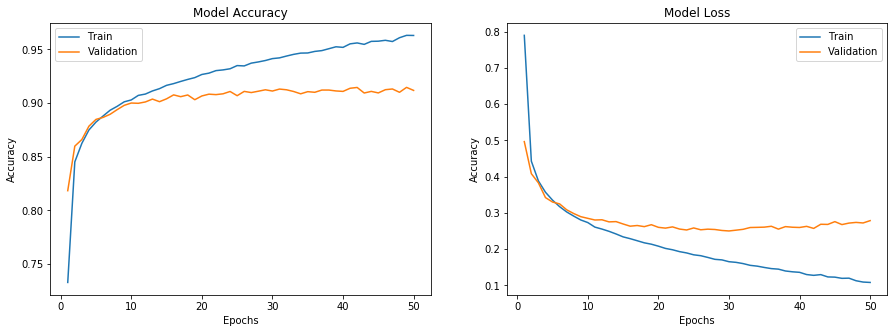

In [19]:
# learning curve
epoch_range = range(1,51)
fig = plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, model.history.history['accuracy'], label = "Train")
plt.plot(epoch_range, model.history.history['val_accuracy'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_range, model.history.history['loss'], label = "Train")
plt.plot(epoch_range, model.history.history['val_loss'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Loss")
plt.legend()

We can see there is a bit of overfitting in our mode.

In [20]:
# Predictions
pred_classes = model.predict_classes(X_test)
pred_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# accuracy
accuracy = accuracy_score(y_test, pred_classes)
print(f'Accuracy on test set: {accuracy}')

Accuracy on test set: 0.9157


(<Figure size 1008x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ccc591f5c0>)

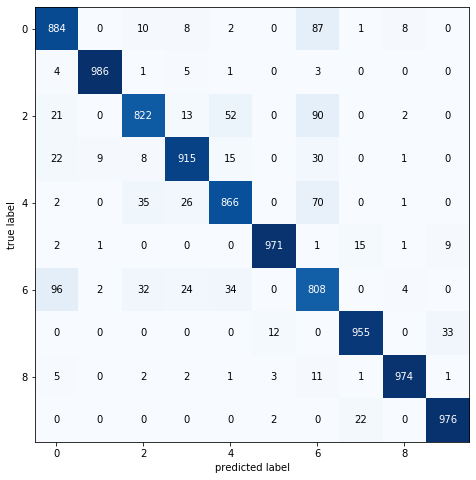

In [22]:
# Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
conf_mat = confusion_matrix(y_test, pred_classes)

#plt.figure(figsize=(14,10))
#sns.heatmap(conf_mat, annot=True)
plot_confusion_matrix(conf_mat,figsize=(14,8),)

In [23]:
# classification report
print(classification_report(y_test, pred_classes,target_names=labels))

               precision    recall  f1-score   support

0-T-shirt/top       0.85      0.88      0.87      1000
    1-Trouser       0.99      0.99      0.99      1000
   2-Pullover       0.90      0.82      0.86      1000
      3-Dress       0.92      0.92      0.92      1000
       4-Coat       0.89      0.87      0.88      1000
     5-Sandal       0.98      0.97      0.98      1000
      6-Shirt       0.73      0.81      0.77      1000
    7-Sneaker       0.96      0.95      0.96      1000
        8-Bag       0.98      0.97      0.98      1000
 9-Ankle boot       0.96      0.98      0.97      1000

    micro avg       0.92      0.92      0.92     10000
    macro avg       0.92      0.92      0.92     10000
 weighted avg       0.92      0.92      0.92     10000



### Prediction Vs True labels

Here we will check prediction vs the true labels for first 25 images from the test data.

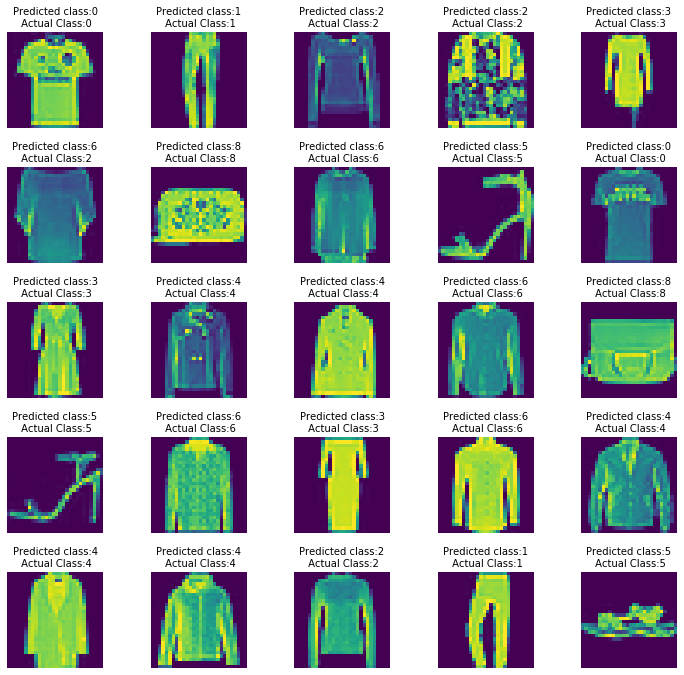

In [24]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f'Predicted class:{pred_classes[i]}\n Actual Class:{int(y_test[i])}',fontsize = 10)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)